# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [15]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [16]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX")
px.set_mapbox_access_token(mapbox_token)

## Load Data

In [17]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

<AxesSubplot:xlabel='year'>

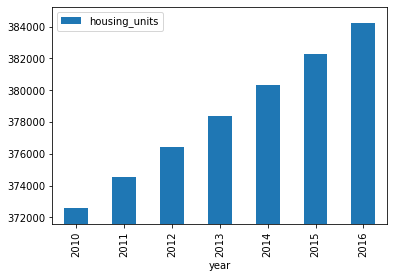

In [18]:
# Calculate the mean number of housing units per year (hint: use groupby)
# Use the Pandas plot function to plot the average housing units per year.
sfo_data_ymin = sfo_data["housing_units"].min() - 1000
sfo_data_ymax = sfo_data["housing_units"].max() + 1000

sfo_data.groupby(["year"]).mean().plot(kind="bar", y="housing_units", ylim=(sfo_data_ymin, sfo_data_ymax))

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [19]:
# Calculate the average gross rent and average sale price per square foot
sfo_data.groupby(["year"]).mean()

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


<AxesSubplot:xlabel='year'>

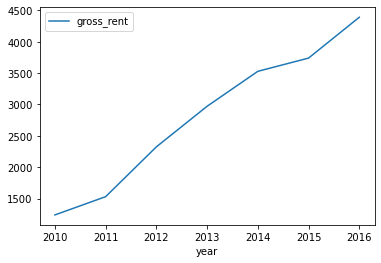

In [20]:
# Plot the Average Gross Rent per Year as a Line Chart 
sfo_data.groupby(["year"]).mean().plot(kind="line", y="gross_rent")

### Average Sales Price per Year

<AxesSubplot:xlabel='year'>

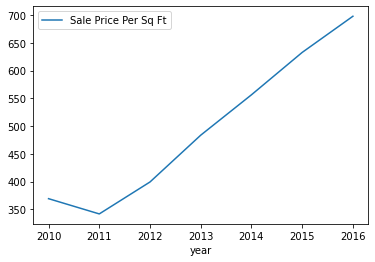

In [21]:
# Plot the Average Sales Price per Year as a line chart
sfo_data.groupby(["year"]).mean().plot(kind="line", y="sale_price_sqr_foot", label="Sale Price Per Sq Ft")

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [22]:
# Group by year and neighborhood and then create a new dataframe of the mean values
grouped_sfo_data = sfo_data.groupby(["year", "neighborhood"]).mean()
grouped_sfo_data.sample(15)

,,sale_price_sqr_foot,housing_units,gross_rent
year,neighborhood,,,
2011,Western Addition,227.418981,374507,1530
2014,Telegraph Hill,708.193032,380348,3528
2012,Telegraph Hill,465.802122,376454,2324
2016,Twin Peaks,970.085470,384242,4390
2010,Alamo Square,291.182945,372560,1239
2016,Mission Terrace,879.017013,384242,4390
2012,Lake --The Presidio,380.521484,376454,2324
2016,Westwood Park,631.195426,384242,4390
2013,Outer Parkside,372.241986,378401,2971


In [23]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
grouped_sfo_data.hvplot.line(x="year", y="sale_price_sqr_foot", xlabel="Year", ylabel="Sale Price Per Sqr Foot", groupby="neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [24]:
# Getting the data from the top 10 expensive neighborhood
sfo_avg_neighborhood_cost_data = sfo_data.groupby("neighborhood").mean()
# sfo_avg_neighborhood_cost_data.head()

sfo_avg_neighborhood_cost_data.sort_values("sale_price_sqr_foot", ascending=False, inplace=True)
sfo_avg_neighborhood_cost_data.head(10)

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


<AxesSubplot:xlabel='SFO Neighborhood', ylabel='Sale Price Per Square Foot'>

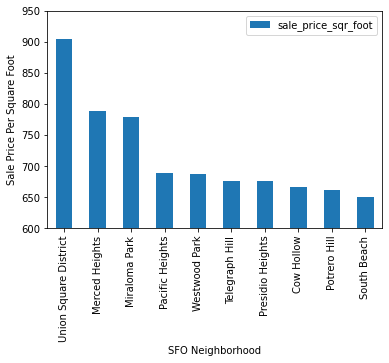

In [25]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_avg_neighborhood_cost_data.head(10).plot(kind="bar", y="sale_price_sqr_foot", xlabel="SFO Neighborhood", ylabel="Sale Price Per Square Foot", ylim=(600,950))

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [26]:
# sfo_avg_neighborhood_cost_data.set_index("neighborhood")
sfo_avg_neighborhood_cost_data.sort_values("sale_price_sqr_foot", ascending=False, inplace=True)

In [ ]:
sfo_avg_neighborhood_cost_data.reset_index(inplace=True)

In [28]:
# Parallel Coordinates Plot
fig = px.parallel_coordinates(
    sfo_avg_neighborhood_cost_data,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={"index":"Neighborhood", "sale_price_sqr_foot":"Price Per Square Foot", "housing_units":"Number of Housing Units", "gross_rent":"Gross Rent"})
# sfo_avg_neighborhood_cost_data.head(15)
fig.show()

In [29]:
# Parallel Categories Plot
fig = px.parallel_categories(
    sfo_avg_neighborhood_cost_data.head(10),
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color_continuous_scale=px.colors.sequential.Viridis,
    color="sale_price_sqr_foot",
    labels={"neighborhood":"Neighborhood", "sale_price_sqr_foot":"Price Per Square Foot", "housing_units":"Number of Housing Units", "gross_rent":"Gross Rent"})

fig.show()

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [30]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head(10)

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050
5,Buena Vista Park,37.768160,-122.439330
6,Central Richmond,37.777890,-122.445170
7,Central Sunset,37.749610,-122.489990
8,Clarendon Heights,37.753310,-122.447030
9,Corona Heights,37.785530,-122.456000


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [31]:
# Calculate the mean values for each neighborhood
sfo_avg_neighborhood_cost_data.sort_values("neighborhood", inplace=True)
sfo_avg_neighborhood_cost_data.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
60,Alamo Square,366.020712,378401.0,2817.285714
58,Anza Vista,373.382198,379050.0,3031.833333
70,Bayview,204.588623,376454.0,2318.400000
15,Bayview Heights,590.792839,382295.0,3739.000000
18,Bernal Heights,576.746488,379374.5,3080.333333
40,Buena Vista Park,452.680591,378076.5,2698.833333
50,Central Richmond,394.422399,378401.0,2817.285714
43,Central Sunset,423.687928,378401.0,2817.285714
33,Clarendon Heights,487.244886,376454.0,2250.500000
16,Corona Heights,587.539067,377232.8,2472.000000


In [32]:
# Join the average values with the neighborhood locations
# ffo_df_join = df_neighborhood_locations.set_index("neighborhood").join(sfo_avg_neighborhood_cost_data.set_index("neighborhood"))
# df_neighborhood_locations.head(10)
new_sfo_merge = sfo_avg_neighborhood_cost_data.merge(df_neighborhood_locations, left_on="neighborhood", right_on="Neighborhood")

In [33]:
new_sfo_merge.drop("Neighborhood", axis=1)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,Alamo Square,366.020712,378401.00,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,379050.00,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,376454.00,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.00,3739.000000,37.728740,-122.410980
4,Buena Vista Park,452.680591,378076.50,2698.833333,37.768160,-122.439330
...,...,...,...,...,...,...
64,West Portal,498.488485,376940.75,2515.500000,37.740260,-122.463880
65,Western Addition,307.562201,377427.50,2555.166667,37.792980,-122.435790
66,Westwood Highlands,533.703935,376454.00,2250.500000,37.734700,-122.456854
67,Westwood Park,687.087575,382295.00,3959.000000,37.734150,-122.457000


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [36]:
# Create a scatter mapbox to analyze neighborhood info
sfo_map = px.scatter_mapbox(
    new_sfo_merge,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="neighborhood",
    zoom=10
)

sfo_map.show()